In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as snss

# Define file paths for raw data
raw_data_2024_opp = Path('data/raw/24_25_NBA_opp.csv')
raw_data_2024_team = Path('data/raw/24_25_NBA_team.csv')
raw_data_2025_opp = Path('data/raw/25_26_NBA_opp.csv')
raw_data_2025_team = Path('data/raw/25_26_NBA_team.csv')

# Define file paths for processed data
processed_path = Path('data/processed')

# Load datasets into DataFrames
df_24_opp = pd.read_csv(raw_data_2024_opp)
df_24_team = pd.read_csv(raw_data_2024_team)
df_25_opp = pd.read_csv(raw_data_2025_opp)
df_25_team = pd.read_csv(raw_data_2025_team)


In [7]:
#display the first few rows of each dataframe

#df_24_opp.head()
df_24_team.head()
#df_25_opp.head()
#df_25_team.head()

#check the structure of the dataframe

#df_24_opp.info()
#df_24_team.info()
#df_25_opp.info()
#df_25_team.info()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Cleveland Cavaliers,82,19755,3652,7444,0.491,1303,3401,0.383,...,0.776,917,2806,3723,2304,670,350,1082,1487,9999
1,2.0,Memphis Grizzlies,82,19705,3670,7654,0.479,1141,3106,0.367,...,0.786,1056,2819,3875,2330,726,462,1285,1711,9980
2,3.0,Denver Nuggets,82,19855,3724,7360,0.506,984,2619,0.376,...,0.770,919,2832,3751,2542,656,402,1169,1444,9902
3,4.0,Oklahoma City Thunder,82,19705,3660,7600,0.482,1192,3184,0.374,...,0.819,871,2801,3672,2202,847,465,961,1631,9881
4,5.0,Atlanta Hawks,82,19780,3556,7528,0.472,1107,3089,0.358,...,0.775,974,2675,3649,2426,798,419,1273,1564,9691


In [8]:
#change the name of columns to prepare to merge dataframes, using list comprehension
df_24_opp.columns = [c + '_opp' if c != 'Team' else c for c in df_24_opp.columns]
df_24_team.columns = [c + '_team' if c != 'Team' else c for c in df_24_team.columns]

#df_24_opp.head()
#df_24_team.head()




In [9]:
#change the name of columns to prepare to merge dataframes, using list comprehension
df_25_opp.columns = [c + '_opp' if c != 'Team' else c for c in df_25_opp.columns]
df_25_team.columns = [c + '_team' if c != 'Team' else c for c in df_25_team.columns]

#df_25_opp.head()
#df_25_team.head()

In [10]:
#merge dataframes on 'Team' column Season 2024-25

df_2024 = pd.merge(df_24_team,df_24_opp,on="Team")

df_2024.head()

df_2024.to_csv(processed_path / 'NBA_24_25_season_stats.csv', index=False)





In [11]:
#merge dataframes on 'Team' column Season 2025-26

df_2025 = pd.merge(df_25_team,df_25_opp,on="Team")

df_2025.head()

df_2025.to_csv(processed_path / 'NBA_25_26_season_stats.csv', index=False)

In [12]:
df_2024['Season']= '2024-25'
df_2025['Season']= '2025-26'


In [13]:
#check new columns

df_2024.head()
df_2025.head()


,Rk_team,Team,G_team,MP_team,FG_team,FGA_team,FG%_team,3P_team,3PA_team,3P%_team,...,ORB_opp,DRB_opp,TRB_opp,AST_opp,STL_opp,BLK_opp,TOV_opp,PF_opp,PTS_opp,Season
0,1.0,Oklahoma City Thunder,48,11645,2094,4275,0.490,635,1773,0.358,...,583,1607,2190,1193,353,197,831,1023,5167,2025-26
1,2.0,Cleveland Cavaliers,48,11570,2069,4394,0.471,703,1973,0.356,...,552,1576,2128,1293,419,214,747,979,5592,2025-26
2,3.0,Denver Nuggets,47,11380,2026,4090,0.495,648,1646,0.394,...,560,1472,2032,1257,357,218,568,994,5453,2025-26
3,4.0,Atlanta Hawks,48,11570,2080,4378,0.475,700,1885,0.371,...,548,1671,2219,1326,437,233,766,885,5696,2025-26
4,5.0,Miami Heat,47,11305,2045,4412,0.464,627,1721,0.364,...,568,1660,2228,1272,392,254,746,958,5548,2025-26


In [14]:
# merge both seasons into a single dataframe

df_nba = pd.concat([df_2024, df_2025], ignore_index=True)
df_nba.sample(10)

,Rk_team,Team,G_team,MP_team,FG_team,FGA_team,FG%_team,3P_team,3PA_team,3P%_team,...,ORB_opp,DRB_opp,TRB_opp,AST_opp,STL_opp,BLK_opp,TOV_opp,PF_opp,PTS_opp,Season
10,11.0,Milwaukee Bucks,82,19755,3445,7082,0.486,1161,3003,0.387,...,900,2812,3712,2166,602,315,1055,1552,9269,2024-25
56,26.0,Houston Rockets,44,10735,1905,3984,0.478,503,1361,0.370,...,494,1220,1714,1080,396,208,594,923,4863,2025-26
30,NaN,League Average,82,19787,3419,7318,0.467,1110,3082,0.360,...,912,2705,3617,2177,673,400,1172,1525,9334,2024-25
7,8.0,Boston Celtics,82,19830,3413,7382,0.462,1457,3955,0.368,...,878,2704,3582,1968,567,295,1048,1438,8787,2024-25
57,27.0,Memphis Grizzlies,44,10610,1827,4024,0.454,584,1684,0.347,...,517,1472,1989,1187,386,225,644,905,5123,2025-26
0,1.0,Cleveland Cavaliers,82,19755,3652,7444,0.491,1303,3401,0.383,...,947,2624,3571,2101,641,361,1189,1553,9217,2024-25
24,25.0,New Orleans Pelicans,82,19755,3332,7368,0.452,986,2839,0.347,...,972,2778,3750,2349,739,428,1148,1471,9779,2024-25
51,21.0,Dallas Mavericks,46,11165,1941,4107,0.473,514,1492,0.345,...,571,1589,2160,1226,417,226,631,971,5361,2025-26
25,26.0,Philadelphia 76ers,82,19805,3254,7168,0.454,1041,3050,0.341,...,946,2787,3733,2317,610,420,1311,1530,9499,2024-25
27,28.0,Orlando Magic,82,19730,3130,7034,0.445,921,2892,0.318,...,751,2703,3454,1870,635,361,1329,1666,8655,2024-25


In [10]:
# Save the combined dataframe to a CSV file

df_nba.to_csv(processed_path / 'NBA_stats.csv', index=False)

In [15]:
df_nba_stats = pd.read_csv(processed_path / 'NBA_stats.csv')

df_nba_stats.tail()

,Rk_team,Team,G_team,MP_team,FG_team,FGA_team,FG%_team,3P_team,3PA_team,3P%_team,...,ORB_opp,DRB_opp,TRB_opp,AST_opp,STL_opp,BLK_opp,TOV_opp,PF_opp,PTS_opp,Season
57,27.0,Memphis Grizzlies,44,10610,1827,4024,0.454,584,1684,0.347,...,517,1472,1989,1187,386,225,644,905,5123,2025-26
58,28.0,Washington Wizards,45,10850,1859,4060,0.458,579,1628,0.356,...,609,1544,2153,1284,437,252,603,779,5527,2025-26
59,29.0,Milwaukee Bucks,45,10850,1849,3835,0.482,660,1679,0.393,...,493,1518,2011,1224,375,179,612,843,5219,2025-26
60,30.0,Brooklyn Nets,45,10875,1699,3832,0.443,631,1832,0.344,...,466,1482,1948,1242,389,219,629,896,5169,2025-26
61,NaN,League Average,46,11224,1945,4151,0.469,617,1720,0.359,...,534,1511,2044,1234,390,227,679,942,5378,2025-26


In [16]:
# Responding the question: Who are the top contenders based on Net Rating, 2024?

# Adding a new column 'Net_Rating' to the dataframe: PTS_team - PTS_opp

df_nba_stats['Net_Rating'] = df_nba_stats['PTS_team'] - df_nba_stats['PTS_opp']

# Display the top 10 teams based on Net Rating Season 2024-25

top_teams_2024 = df_nba_stats.loc[df_nba_stats['Season']=='2024-25',['Team', 'Season', 'Net_Rating']].sort_values(by='Net_Rating', ascending=False).head(5)

top_teams_2024


,Team,Season,Net_Rating
3,Oklahoma City Thunder,2024-25,1055
0,Cleveland Cavaliers,2024-25,782
7,Boston Celtics,2024-25,747
12,Minnesota Timberwolves,2024-25,410
1,Memphis Grizzlies,2024-25,398


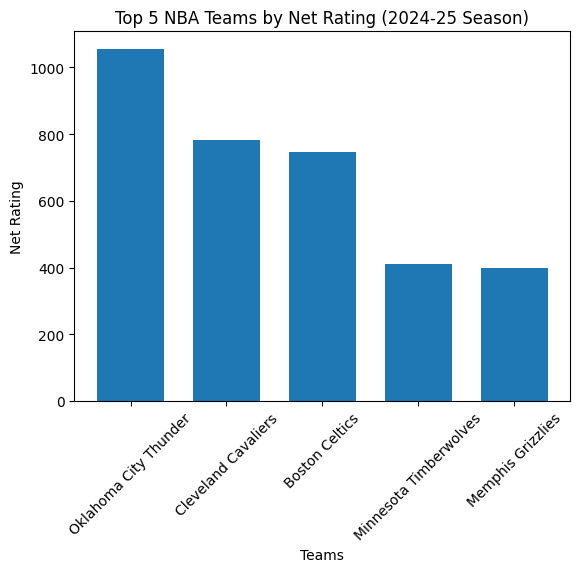

In [65]:
top_teams_2024_x = top_teams_2024['Team'].to_list()

top_teams_2024_y = top_teams_2024['Net_Rating'].to_list()

plt.bar(top_teams_2024_x, top_teams_2024_y, width=0.7)
plt.title('Top 5 NBA Teams by Net Rating (2024-25 Season)')
plt.xlabel('Teams')
plt.ylabel('Net Rating')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Responding the question: Who are the top contenders based on Net Rating, 2025?

# Adding a new column 'Net_Rating' to the dataframe: PTS_team - PTS_opp

df_nba_stats['Net_Rating'] = df_nba_stats['PTS_team'] - df_nba_stats['PTS_opp']

# Display the top 10 teams based on Net Rating Season 2025-26

top_teams_2025 = df_nba_stats.loc[df_nba_stats['Season']=='2025-26',['Team', 'Season', 'Net_Rating']].sort_values(by='Net_Rating', ascending=False).head(5)

top_teams_2025

,Team,Season,Net_Rating
31,Oklahoma City Thunder,2025-26,616
50,Detroit Pistons,2025-26,324
47,Boston Celtics,2025-26,307
56,Houston Rockets,2025-26,273
45,San Antonio Spurs,2025-26,230


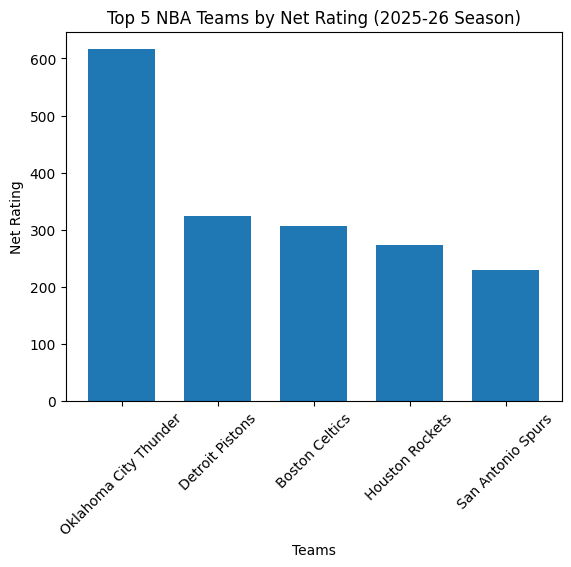

In [18]:
top_teams_2025_x = top_teams_2025['Team'].to_list()

top_teams_2025_y = top_teams_2025['Net_Rating'].to_list()

plt.bar(top_teams_2025_x, top_teams_2025_y, width=0.7)
plt.title('Top 5 NBA Teams by Net Rating (2025-26 Season)')
plt.xlabel('Teams')
plt.ylabel('Net Rating')
plt.xticks(rotation=45)
plt.show()

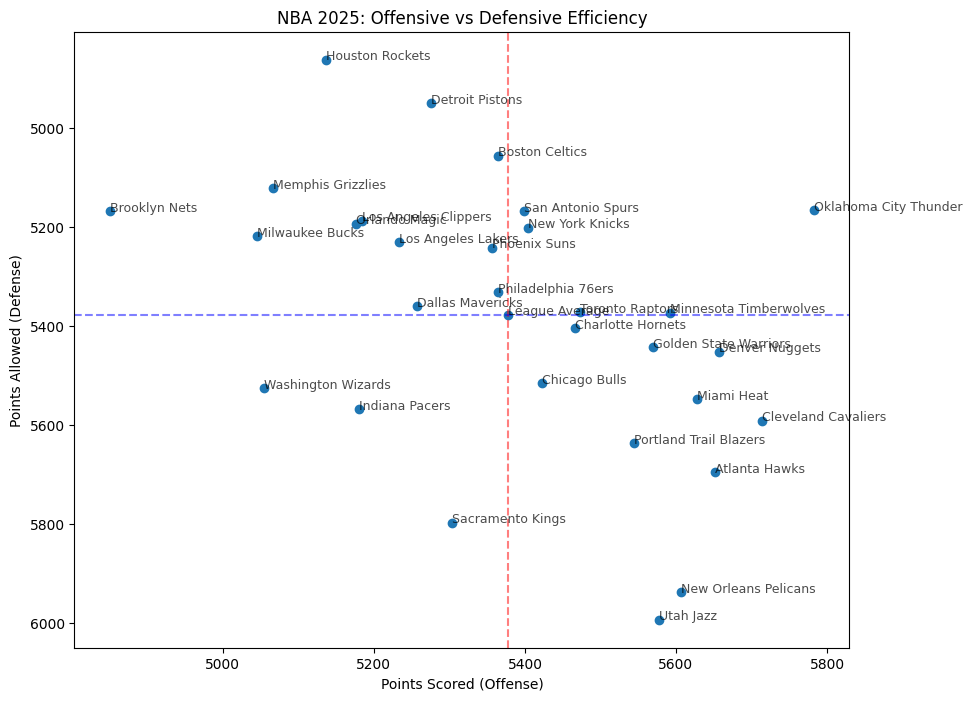

In [19]:
#Which teams have the most efficient offense vs. the most suffocating defense? 2025 season

# To respond: Offensive Efficiency: PTS. Defensive Efficiency:PTS_opp

df_2025 = df_nba_stats[df_nba_stats['Season'] == '2025-26']
df_2025.head()

mean_PTS_team_2025 = df_2025['PTS_team'].mean()
mean_PTS_opp_2025 = df_2025['PTS_opp'].mean()

plt.figure(figsize=(10, 8))
plt.scatter(df_2025['PTS_team'], df_2025['PTS_opp'])

# Create the labels for each point
for i, row in df_2025.iterrows():
    plt.annotate(row['Team'], (row['PTS_team'], row['PTS_opp']), fontsize=9, alpha=0.7)

# invert the axis so that "less points allowed" is at the top
plt.gca().invert_yaxis() 
plt.axvline(mean_PTS_team_2025, color='red', linestyle='--', alpha=0.5)
plt.axhline(mean_PTS_opp_2025, color='blue', linestyle='--', alpha=0.5)
plt.xlabel('Points Scored (Offense)')
plt.ylabel('Points Allowed (Defense)')
plt.title('NBA 2025: Offensive vs Defensive Efficiency')
plt.show()

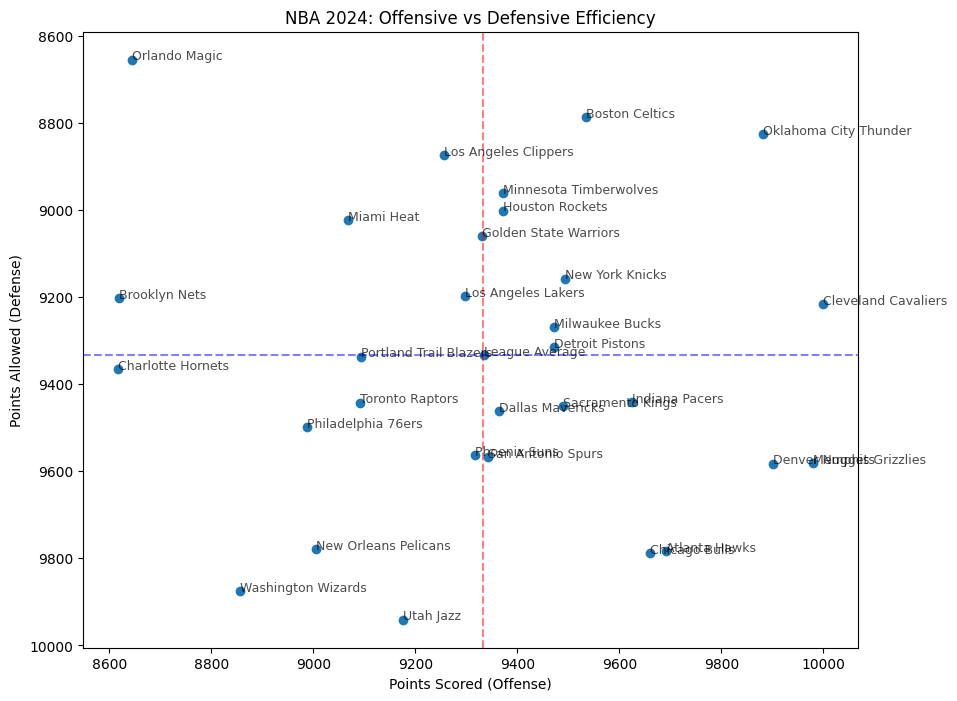

In [20]:
#Which teams have the most efficient offense vs. the most suffocating defense? 2024 season

# To respond: Offensive Efficiency: PTS. Defensive Efficiency:PTS_opp

# Estructura lógica (intenta escribirlo tú):
df_2024 = df_nba_stats[df_nba_stats['Season'] == '2024-25']
df_2024.head()
mean_PTS_team_2024 = df_2024['PTS_team'].mean()
mean_PTS_opp_2024 = df_2024['PTS_opp'].mean()

plt.figure(figsize=(10, 8))
plt.scatter(df_2024['PTS_team'], df_2024['PTS_opp'])
# Create the labels for each point
for i, row in df_2024.iterrows():
    plt.annotate(row['Team'], (row['PTS_team'], row['PTS_opp']), fontsize=9, alpha=0.7)


# Invertir el eje para que "menos puntos recibidos" esté arriba
plt.gca().invert_yaxis() 
plt.axvline(mean_PTS_team_2024, color='red', linestyle='--', alpha=0.5)
plt.axhline(mean_PTS_opp_2024, color='blue', linestyle='--', alpha=0.5)
plt.xlabel('Points Scored (Offense)')
plt.ylabel('Points Allowed (Defense)')
plt.title('NBA 2024: Offensive vs Defensive Efficiency')
plt.show()

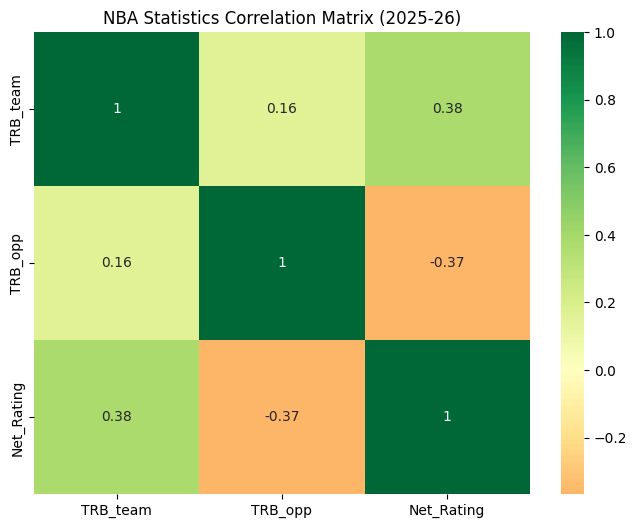

In [23]:
#Is there a high correlation between Total Rebounds (TRB) and Win Percentage?

#df_2025.loc[:, ['TRB_opp', 'TRB_team']]
#df_2024.loc[:, ['TRB_opp', 'TRB_team']]

correlation_25_team = df_2025['TRB_team'].corr(df_2025['Net_Rating'])
correlation_25_opp = df_2025['TRB_opp'].corr(df_2025['Net_Rating'])

correlation_24_team = df_2024['TRB_team'].corr(df_2024['Net_Rating'])
correlation_24_opp = df_2024['TRB_opp'].corr(df_2024['Net_Rating']) 

# Display correlation results
columns_to_analyze = ['TRB_team', 'TRB_opp', 'Net_Rating']

# Create table of correlations for season 2024-25
#correlation_table_24 = df_2024[columns_to_analyze].corr()
#correlation_table_24

# Create table of correlations for season 2025-26
correlation_table_25 = df_2025[columns_to_analyze].corr()
correlation_table_25

plt.figure(figsize=(8, 6))
snss.heatmap(correlation_table_25, annot=True, cmap='RdYlGn', center=0)
plt.title('NBA Statistics Correlation Matrix (2025-26)')
plt.show()






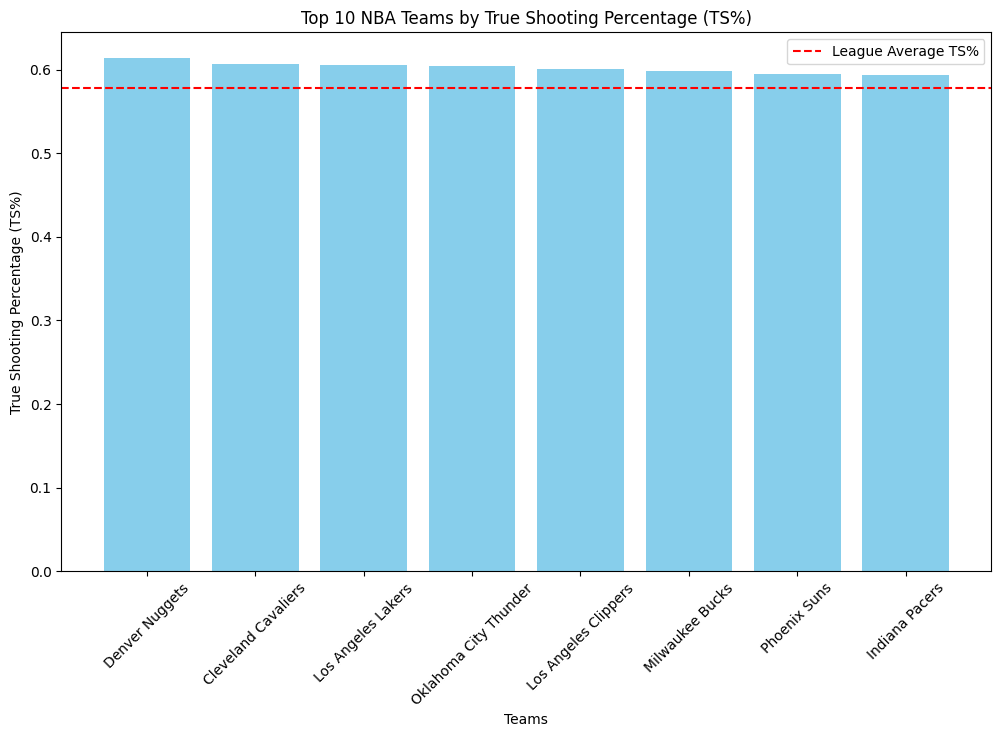

In [34]:
# Respond the question of Who leads the league in True Shooting Percentage (TS%)?

# first add the column of TS% to the dataframe, using the formula: TS% = PTS / (2 * (FGA + 0.44 * FTA))

df_nba_stats['TS%'] = df_nba_stats['PTS_team'] / (2*(df_nba_stats['FGA_team'] + 0.44 * df_nba_stats['FTA_team']))

ts_top = df_nba_stats[['Team', 'TS%', 'PTS_team']].sort_values(by='TS%', ascending=False).head(10)

league_avg_TS = df_nba_stats['TS%'].mean()

plt.figure(figsize=(12, 7))
plt.bar(ts_top['Team'], ts_top['TS%'], color='skyblue')
plt.axhline(league_avg_TS, color='red', linestyle='--', label='League Average TS%')
plt.title('Top 10 NBA Teams by True Shooting Percentage (TS%)')
plt.xlabel('Teams')
plt.ylabel('True Shooting Percentage (TS%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()
